In [1]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt

In [2]:
map_df=gdp.read_file('../input/london-borough-shape-and-data/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

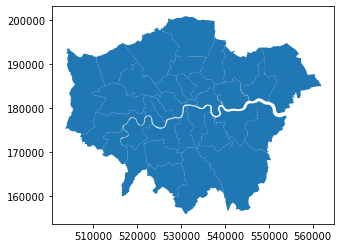

In [3]:
map_df.plot()

In [4]:
df=pd.read_csv('../input/london-borough-shape-and-data/london-borough-profiles.csv',encoding='cp1252')
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [5]:
df=df[['Area_name','Happiness_score_2011-14_(out_of_10)','Anxiety_score_2011-14_(out_of_10)','Population_density_(per_hectare)_2017','Mortality_rate_from_causes_considered_preventable_2012/14']]

In [6]:
df.head()

,Area_name,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Population_density_(per_hectare)_2017,Mortality_rate_from_causes_considered_preventable_2012/14
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [7]:
dformap=df.rename(index=str,columns={'Area_name':'borough',
    'Happiness_score_2011-14_(out_of_10)':'happiness',
                                     'Anxiety_score_2011-14_(out_of_10)':'anxiety',
                                    'Population_density_(per_hectare)_2017}':'population density per hectare',
                                     'Mortality_rate_from_causes_considered_preventable_2012/14':
                                     'mortality'})
dformap.head()

,borough,happiness,anxiety,Population_density_(per_hectare)_2017,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [8]:
merged=map_df.set_index('NAME').join(dformap.set_index('borough'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,Population_density_(per_hectare)_2017,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


In [9]:
merged[popd].max()

NameError: name 'popd' is not defined

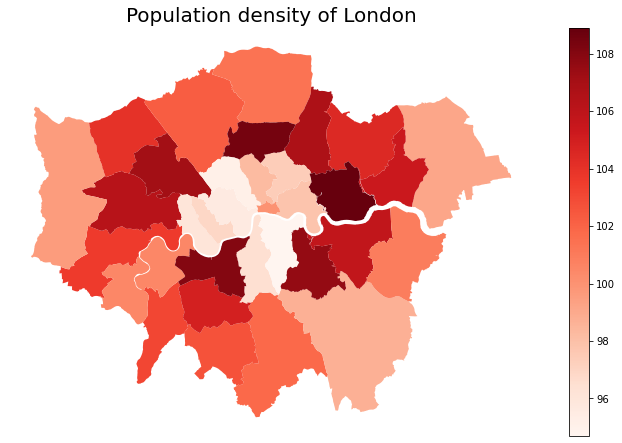

In [10]:
popd='Population_density_(per_hectare)_2017'
vmin,vmax=merged[popd].min(),merged[popd].max()
fig,ax=plt.subplots(1,figsize=(12,7.5))
merged.plot(column=popd,cmap='Reds',ax=ax)
ax.axis('off')
plt.title('Population density of London',{'fontsize': '20',
 'fontweight' :'100'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

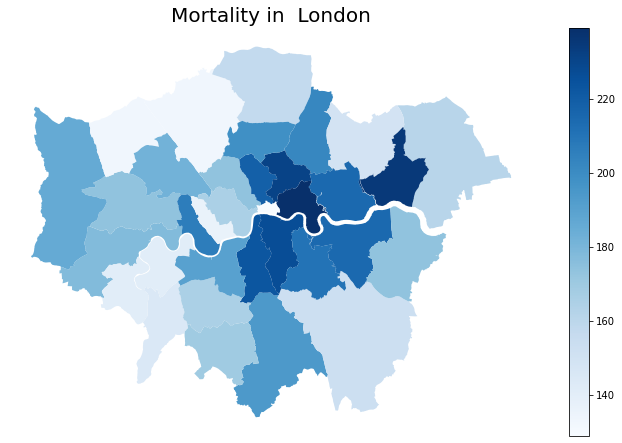

In [11]:
hap='mortality'
vmin,vmax=merged[hap].min(),merged[hap].max()
fig,ax=plt.subplots(1,figsize=(12,7.5))
merged.plot(column=hap,cmap='Blues',ax=ax)
ax.axis('off')
plt.title('Mortality in  London',{'fontsize': '20',
 'fontweight' :'100'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)